In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pylab as plt
%matplotlib inline

from scipy.stats import zscore

import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
customer_data_raw = pd.read_csv("bank.csv")

# EDA

In [20]:
customer_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
customer_data_raw.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [22]:
customer_data_raw.isnull().sum().sort_values(ascending = False)

Exited             0
EstimatedSalary    0
IsActiveMember     0
HasCrCard          0
NumOfProducts      0
Balance            0
Tenure             0
Age                0
Gender             0
Geography          0
CreditScore        0
Surname            0
CustomerId         0
RowNumber          0
dtype: int64

In [23]:
customer_data_raw.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [24]:
# Removing the ID and the index from the analises (can't be used)

value_columns = customer_data_raw.columns
value_columns = value_columns.drop('RowNumber')
value_columns = value_columns.drop('CustomerId')

# Removing surname, it does not make sense to me trying to use it in the analysis process, because I understand it almost as a categorical, but it has too many points to this data and can leads to overfit of data
value_columns = value_columns.drop('Surname')

customer_data_base = pd.DataFrame(customer_data_raw, columns = value_columns)

In [25]:
# Converting dummies into columns

listDummies = ['Gender', 'Geography']
customer_data = pd.get_dummies(customer_data_base, columns=listDummies)

In [26]:
customer_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.454300,0.545700,0.501400,0.250900,0.247700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.497932,0.500023,0.433553,0.431698
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


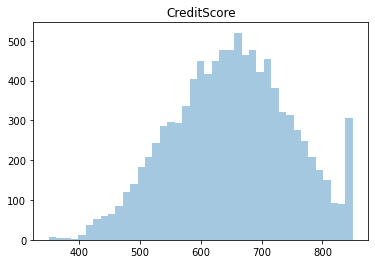

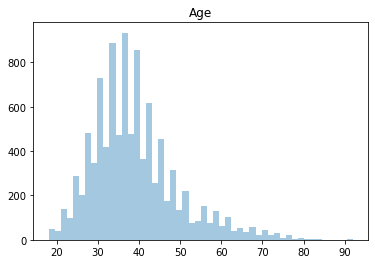

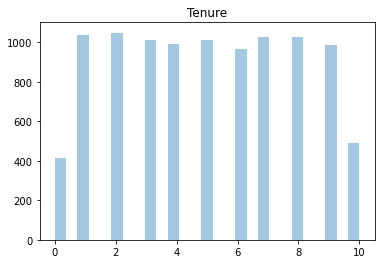

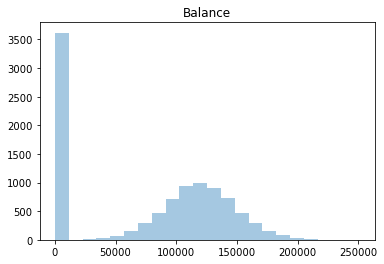

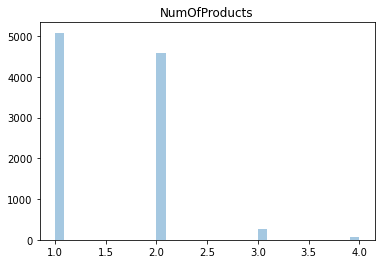

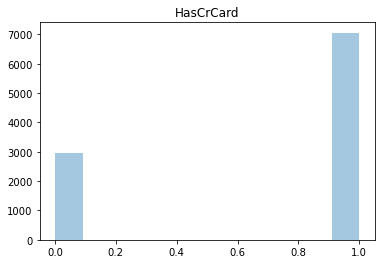

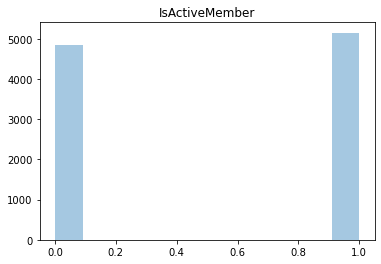

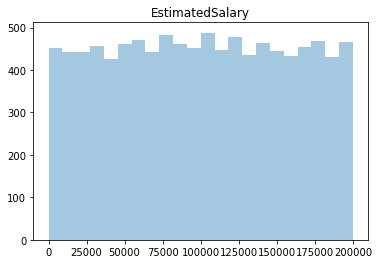

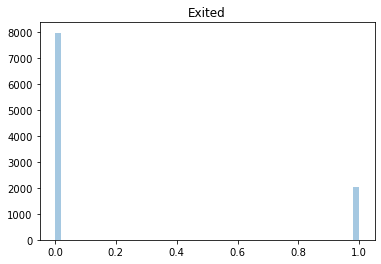

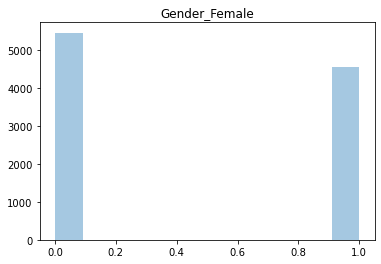

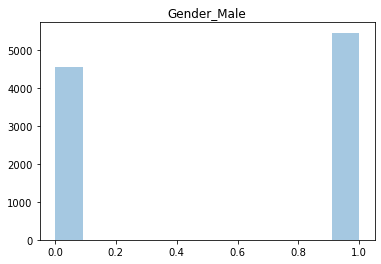

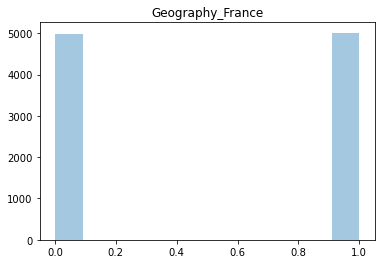

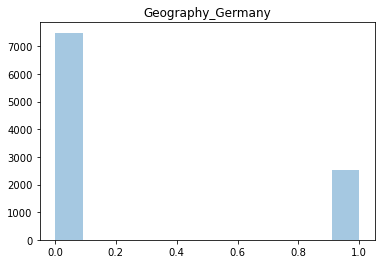

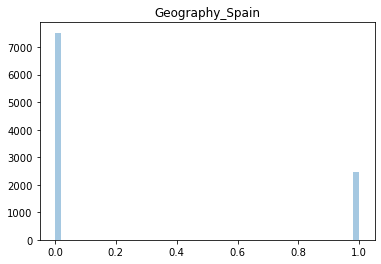

In [27]:
plt.rcParams["figure.figsize"] = (6,4)

for column in customer_data.columns:
    fig = sns.distplot(customer_data[column], kde=False)
    plt.title(column)
    plt.xlabel('')
    plt.show()

In [28]:
# Verifying the data structure after the cleaning

customer_data['Exited'] = customer_data['Exited'].astype('uint8')

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  uint8  
 9   Gender_Female      10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Geography_France   10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(6)
memory usage: 683.7 KB


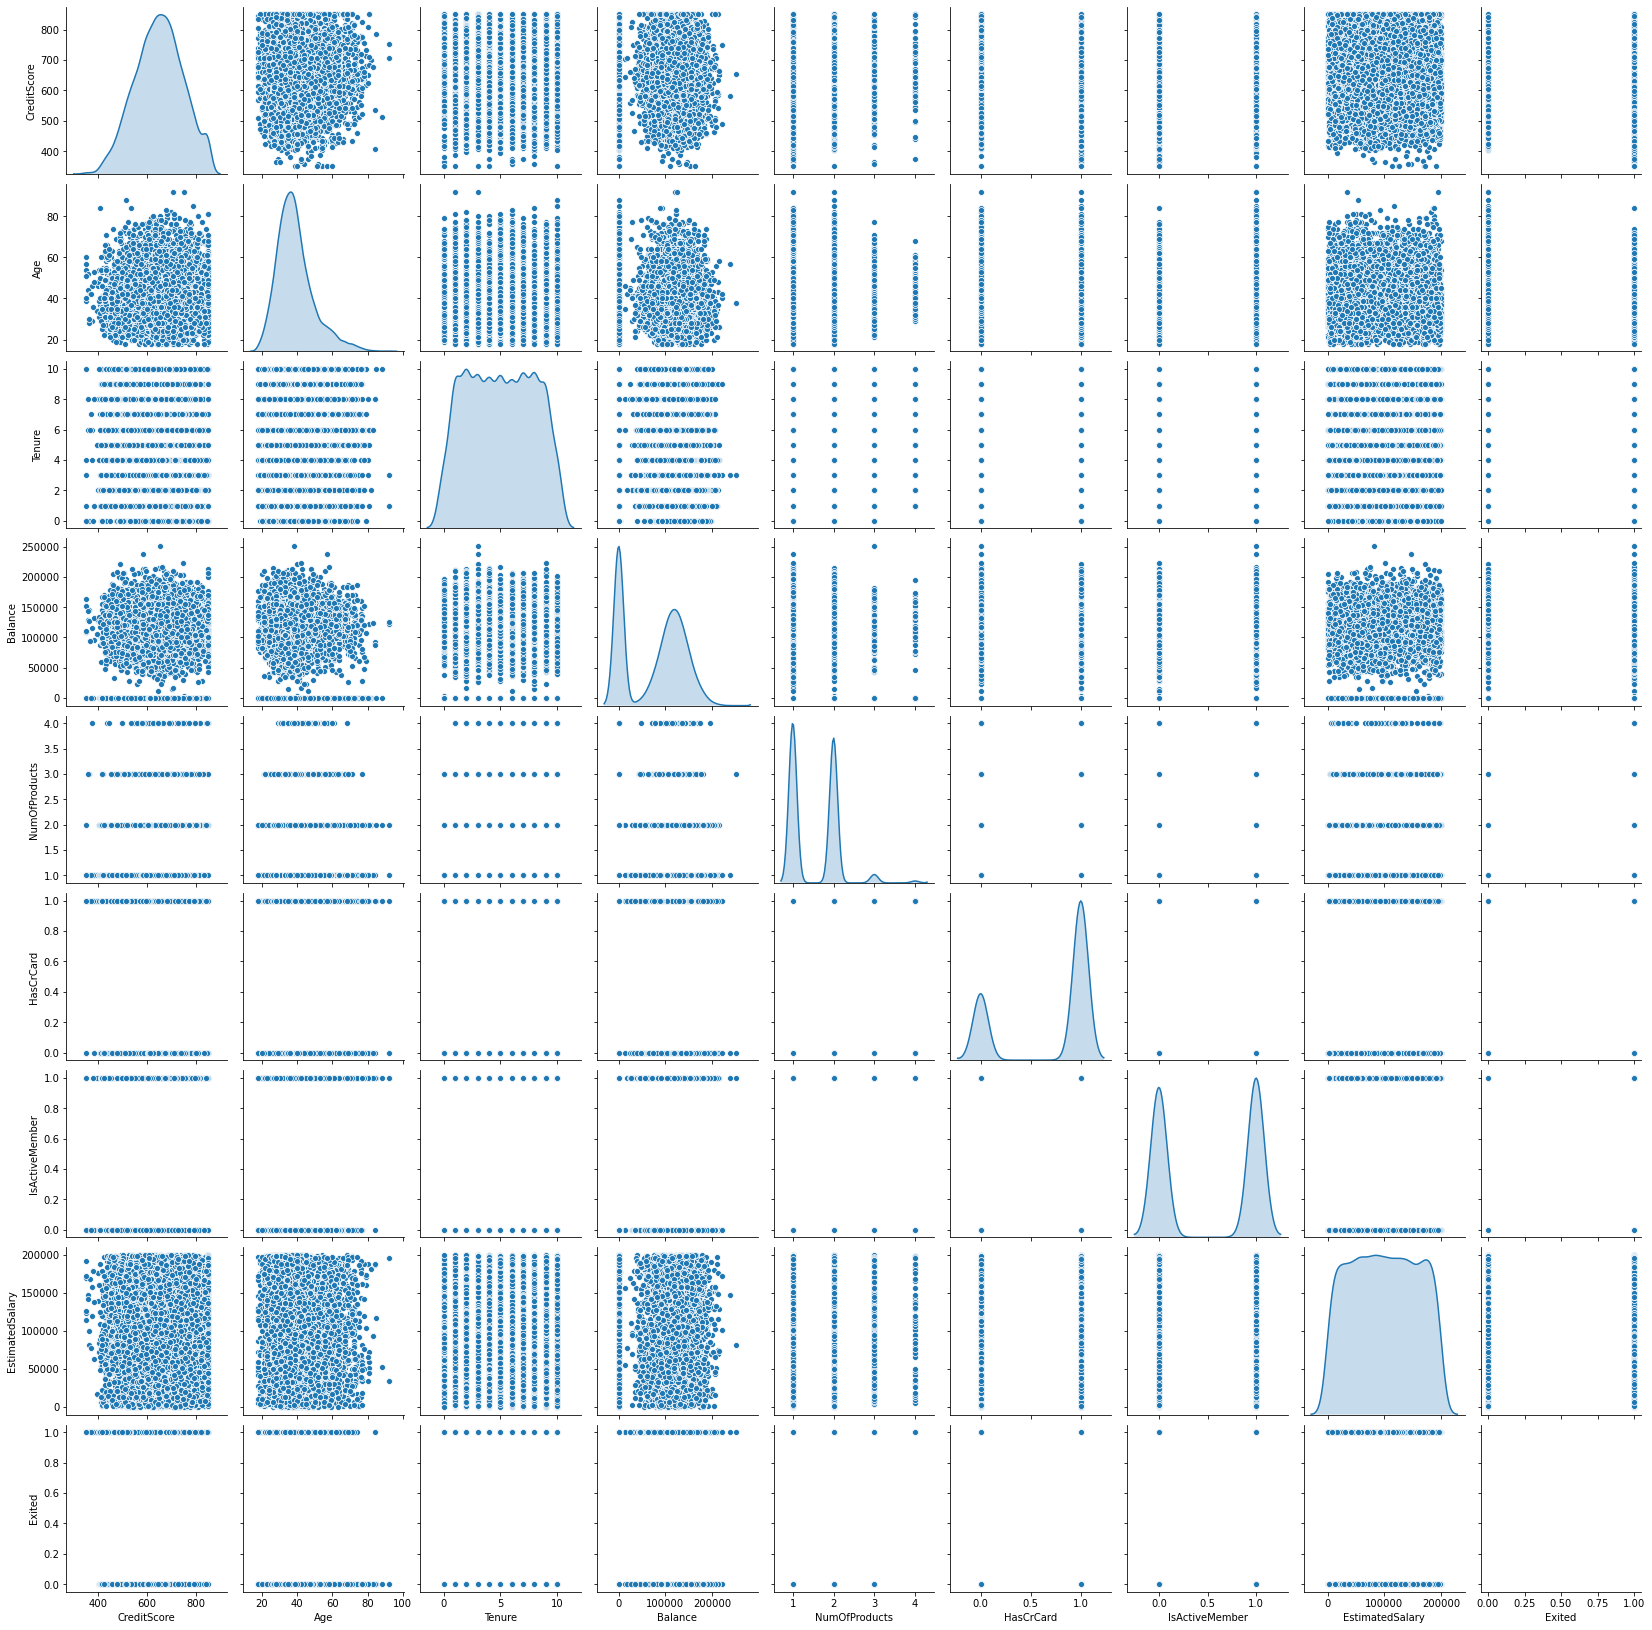

In [29]:
# Scaling the values to see the values without issues

#customer_data_scaled = customer_data_attr.apply(zscore)
sns.pairplot(customer_data.iloc[:,0:9],diag_kind='kde')

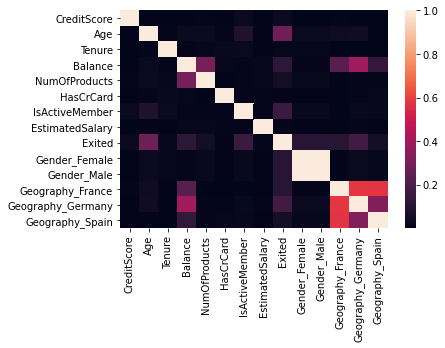

In [30]:
corr_matrix = customer_data.corr().abs()
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values)

In [31]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
customer_data_rdy = customer_data.drop(to_drop, axis=1)

In [32]:
customer_data_rdy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1


# Models

In [94]:
# Double spliting the data to have Train, Test and Validation Data

#Excluding columns with low correlation
#columns_exc = ['NumOfProducts','IsActiveMember','Gender_Male','Exited']
columns_exc = ['Exited']

X = customer_data_rdy.drop(columns_exc , axis=1)
y = customer_data_rdy.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [95]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# Scale the validation set
X_val = scaler.transform(X_val)

In [96]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

## Model 1

In [97]:
X_test.shape

(2000, 12)

In [98]:
# Initialize the constructor
model = Sequential()

# Add an first hidden layer, Adjusted the Density to 8 to match the shape of the data
model.add(Dense(13, activation='relu', kernel_initializer='normal'))

# Softmax to try helping the categorization of Yes / No
model.add(Dense(2,activation='softmax'))

In [99]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.5,
    decay_steps=100,
    decay_rate=0.9)
optimizer2 = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(loss='binary_crossentropy', optimizer=optimizer2 , metrics=['accuracy']) 

In [100]:
epochs = 20

history = model.fit(X_train, y_train.values, epochs=epochs, validation_split = 0.2, verbose = False)

hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

[]

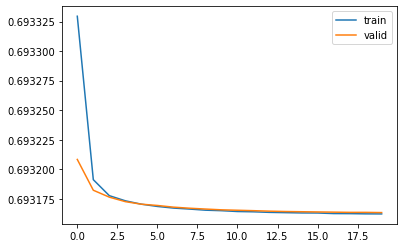

In [101]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc = 0)

plt.plot()

Confusion Matrix


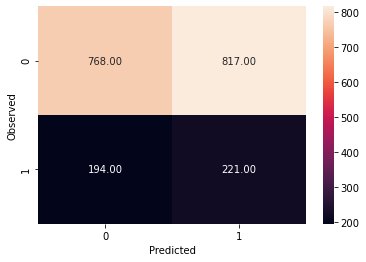

None
Accuracy
0.4945

Recall
0.5325301204819277

Precision
0.21290944123314065

F1
0.3041982105987611

Roc Auc
0.5085363536163582



In [102]:
# I had a lot of issues with "continuous variable" and after some research I finded this way to do

#Softmax already returns a percentage chance for the category in this case, no need to normalize
y_predict = model.predict(X_test)
y_predict_chance = y_predict[:,1]

threshold = 0.5

y_pred_classes = np.zeros_like(y_predict_chance)
y_pred_classes[y_predict_chance > threshold] = 1

y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test > threshold] = 1

print('Confusion Matrix')
print(draw_cm(y_test_classes, y_pred_classes))

print('Accuracy')
print(str(metrics.accuracy_score(y_test_classes, y_pred_classes)))
print()

print('Recall')
print(str(metrics.recall_score(y_test_classes, y_pred_classes)))
print()

print('Precision')
print(str(metrics.precision_score(y_test_classes, y_pred_classes)))
print()

print('F1')
print(str(metrics.f1_score(y_test_classes, y_pred_classes)))
print()

print('Roc Auc')
print(str(metrics.roc_auc_score(y_test_classes, y_pred_classes)))
print()

Confusion Matrix


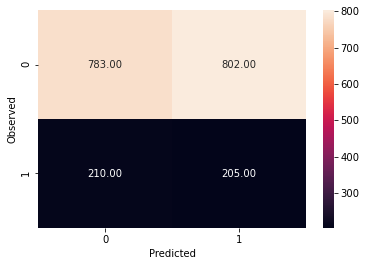

None
Accuracy
0.494

Recall
0.4939759036144578

Precision
0.2035749751737835

F1
0.2883263009845288

Roc Auc
0.49399110638136134



In [103]:
# I had a lot of issues with "continuous variable" and after some research I finded this way to do

y_predict = model.predict(X_val)
y_predict_chance = y_predict[:,1]

threshold = 0.5

y_pred_classes = np.zeros_like(y_predict_chance)
y_pred_classes[y_predict_chance > threshold] = 1

y_test_classes = np.zeros_like(y_val)
y_test_classes[y_val > threshold] = 1

print('Confusion Matrix')
print(draw_cm(y_test_classes, y_pred_classes))

print('Accuracy')
print(str(metrics.accuracy_score(y_test_classes, y_pred_classes)))
print()

print('Recall')
print(str(metrics.recall_score(y_test_classes, y_pred_classes)))
print()

print('Precision')
print(str(metrics.precision_score(y_test_classes, y_pred_classes)))
print()

print('F1')
print(str(metrics.f1_score(y_test_classes, y_pred_classes)))
print()

print('Roc Auc')
print(str(metrics.roc_auc_score(y_test_classes, y_pred_classes)))
print()

## Model 2

### Changes

#### Loss changed from binary_crossentropy to sparse_categorical_crossentropy because sparse works better with range of values
#### Optimizer changed to adam. I tried several, and after some research I discovered that Adam has a good precision result
#### Metrics changed from Accuracy to Mean Absolute Error and Mean Square Error
#### Epochs changed, because after some tests it shows the best result in validation

In [104]:
# Initialize the constructor
model2 = Sequential()

# Add an first hidden layer, Adjusted the Density to 8 to match the shape of the data
model2.add(Dense(13, activation='relu', kernel_initializer='normal'))

# Softmax to try helping the categorization of Yes / No
model2.add(Dense(2,activation='softmax'))

In [105]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam' , metrics = ['mae' , 'mse'])                   

In [106]:
epochs = 30

history2 = model2.fit(X_train, y_train.values, epochs=epochs, validation_split = 0.2, verbose = False)

hist2  = pd.DataFrame(history2.history)
hist2['epoch'] = history2.epoch

In [107]:
hist2.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,0.517413,0.5,0.289270,0.449612,0.5,0.332363,0
1,0.428413,0.5,0.348818,0.424790,0.5,0.354575,1
2,0.407174,0.5,0.358949,0.411146,0.5,0.361687,2
3,0.391304,0.5,0.364390,0.400508,0.5,0.365398,3
4,0.378195,0.5,0.368853,0.390690,0.5,0.369569,4


[]

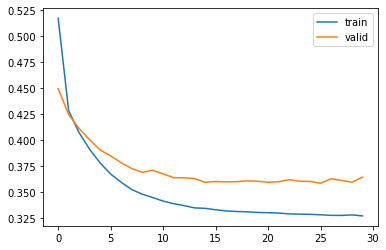

In [108]:
plt.plot(hist2['loss'])
plt.plot(hist2['val_loss'])
plt.legend(("train" , "valid") , loc = 0)

plt.plot()

[]

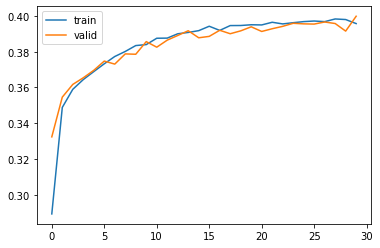

In [109]:
plt.plot(hist2['mse'])
plt.plot(hist2['val_mse'])
plt.legend(("train" , "valid") , loc = 0)

plt.plot()

Confusion Matrix


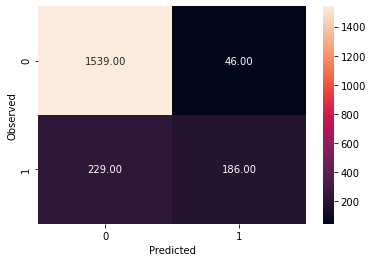

None
Accuracy
0.8625

Recall
0.44819277108433736

Precision
0.8017241379310345

F1
0.5749613601236476

Roc Auc
0.7095853445327049



In [110]:
y_predict = model2.predict(X_test)
y_predict_chance = y_predict[:,1]

threshold = 0.5
y_pred_classes = np.zeros_like(y_predict_chance)
y_pred_classes[y_predict_chance > threshold] = 1

y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test > threshold] = 1

print('Confusion Matrix')
print(draw_cm(y_test_classes, y_pred_classes))

print('Accuracy')
print(str(metrics.accuracy_score(y_test_classes, y_pred_classes)))
print()

print('Recall')
print(str(metrics.recall_score(y_test_classes, y_pred_classes)))
print()

print('Precision')
print(str(metrics.precision_score(y_test_classes, y_pred_classes)))
print()

print('F1')
print(str(metrics.f1_score(y_test_classes, y_pred_classes)))
print()

print('Roc Auc')
print(str(metrics.roc_auc_score(y_test_classes, y_pred_classes)))
print()

Confusion Matrix


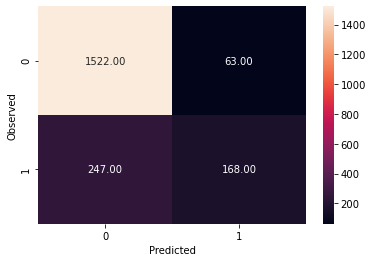

None
Accuracy
0.845

Recall
0.40481927710843374

Precision
0.7272727272727273

F1
0.5201238390092879

Roc Auc
0.6825358215195165



In [111]:
#Softmax already returns a percentage chance for the category in this case, no need to normalize
y_predict = model2.predict(X_val)
y_predict_chance = y_predict[:,1]

threshold = 0.5
y_pred_classes = np.zeros_like(y_predict_chance)
y_pred_classes[y_predict_chance > threshold] = 1

y_test_classes = np.zeros_like(y_val)
y_test_classes[y_val > threshold] = 1

print('Confusion Matrix')
print(draw_cm(y_test_classes, y_pred_classes))

print('Accuracy')
print(str(metrics.accuracy_score(y_test_classes, y_pred_classes)))
print()

print('Recall')
print(str(metrics.recall_score(y_test_classes, y_pred_classes)))
print()

print('Precision')
print(str(metrics.precision_score(y_test_classes, y_pred_classes)))
print()

print('F1')
print(str(metrics.f1_score(y_test_classes, y_pred_classes)))
print()

print('Roc Auc')
print(str(metrics.roc_auc_score(y_test_classes, y_pred_classes)))
print()

# Model 3

### Changes

#### Loss changed to binary_crossentropy to try sigmoid output and binary_crossentropy
#### Epochs changed, because after some tests it shows the best result in validation

In [129]:
# Initialize the constructor
model3 = Sequential()

model3.add(Dense(12, input_dim=12, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [130]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae','mse'])

In [131]:
epochs = 100

history3 = model3.fit(X_train, y_train.values, epochs=epochs, validation_split = 0.2, verbose = False)

hist3  = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch

In [132]:
hist3.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,0.646392,0.452084,0.227594,0.517615,0.378133,0.170198,0
1,0.487387,0.346786,0.157876,0.463159,0.319971,0.148768,1
2,0.451428,0.306366,0.144152,0.446678,0.294994,0.142628,2
3,0.436385,0.287322,0.138759,0.436331,0.285041,0.138410,3
4,0.425946,0.278918,0.134973,0.428558,0.277509,0.135261,4


[]

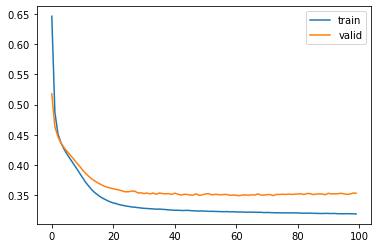

In [133]:
plt.plot(hist3['loss'])
plt.plot(hist3['val_loss'])
plt.legend(("train" , "valid") , loc = 0)

plt.plot()

Confusion Matrix


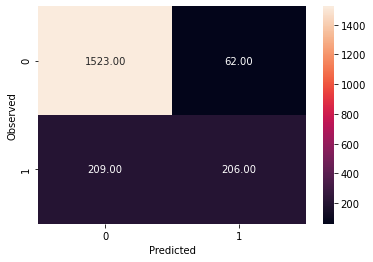

None
Accuracy
0.8645

Recall
0.4963855421686747

Precision
0.7686567164179104

F1
0.603221083455344

Roc Auc
0.7286344114628862



In [134]:
y_predict_chance = model3.predict(X_test)

threshold = 0.5
y_pred_classes = np.zeros_like(y_predict_chance)
y_pred_classes[y_predict_chance > threshold] = 1

y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test > threshold] = 1

print('Confusion Matrix')
print(draw_cm(y_test_classes, y_pred_classes))

print('Accuracy')
print(str(metrics.accuracy_score(y_test_classes, y_pred_classes)))
print()

print('Recall')
print(str(metrics.recall_score(y_test_classes, y_pred_classes)))
print()

print('Precision')
print(str(metrics.precision_score(y_test_classes, y_pred_classes)))
print()

print('F1')
print(str(metrics.f1_score(y_test_classes, y_pred_classes)))
print()

print('Roc Auc')
print(str(metrics.roc_auc_score(y_test_classes, y_pred_classes)))
print()

Confusion Matrix


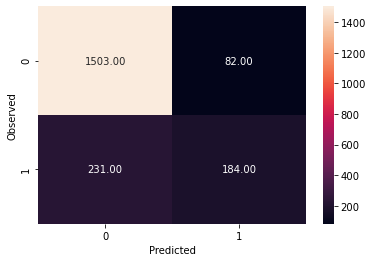

None
Accuracy
0.8435

Recall
0.4433734939759036

Precision
0.6917293233082706

F1
0.540381791483113

Roc Auc
0.6958192391015164



In [135]:
y_predict_chance = model3.predict(X_val)

threshold = 0.5
y_pred_classes = np.zeros_like(y_predict_chance)
y_pred_classes[y_predict_chance > threshold] = 1

y_test_classes = np.zeros_like(y_val)
y_test_classes[y_val > threshold] = 1

print('Confusion Matrix')
print(draw_cm(y_test_classes, y_pred_classes))

print('Accuracy')
print(str(metrics.accuracy_score(y_test_classes, y_pred_classes)))
print()

print('Recall')
print(str(metrics.recall_score(y_test_classes, y_pred_classes)))
print()

print('Precision')
print(str(metrics.precision_score(y_test_classes, y_pred_classes)))
print()

print('F1')
print(str(metrics.f1_score(y_test_classes, y_pred_classes)))
print()

print('Roc Auc')
print(str(metrics.roc_auc_score(y_test_classes, y_pred_classes)))
print()

# Model 4

In [200]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
customer_data_rdy2 = customer_data.drop(to_drop, axis=1)

In [201]:
customer_data_rdy2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1


In [202]:
# Double spliting the data to have Train, Test and Validation Data

#Excluding columns with low correlation
columns_exc = ['Exited']

X2 = customer_data_rdy2.drop(columns_exc , axis=1)
y2 = customer_data_rdy2.Exited

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.25, random_state=1)

In [203]:
modelT = X_train2.shape[1]
modelT

12

In [204]:
# Define the scaler 
scaler2 = StandardScaler().fit(X_train2)

# Scale the train set
X_train2 = scaler2.transform(X_train2)

# Scale the test set
X_test2 = scaler2.transform(X_test2)

# Scale the validation set
X_val2 = scaler2.transform(X_val2)

In [205]:
# Initialize the constructor
model4 = Sequential()

model4.add(Dense(modelT, input_dim=modelT, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

In [206]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae','mse'])

In [207]:
epochs = 100

history4 = model4.fit(X_train2, y_train2.values, epochs=epochs, validation_split = 0.2, verbose = False)

hist4  = pd.DataFrame(history4.history)
hist4['epoch'] = history4.epoch

[]

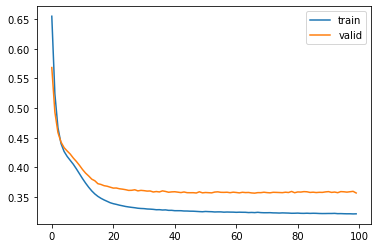

In [208]:
plt.plot(hist4['loss'])
plt.plot(hist4['val_loss'])
plt.legend(("train" , "valid") , loc = 0)

plt.plot()

Confusion Matrix


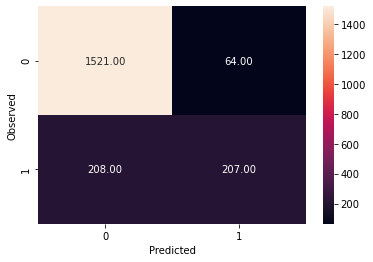

None
Accuracy
0.864

Recall
0.4987951807228916

Precision
0.7638376383763837

F1
0.6034985422740525

Roc Auc
0.7292083159134962



In [209]:
y_predict_chance = model4.predict(X_test2)

threshold = 0.5
y_pred_classes = np.zeros_like(y_predict_chance)
y_pred_classes[y_predict_chance > threshold] = 1

y_test_classes = np.zeros_like(y_test2)
y_test_classes[y_test2 > threshold] = 1

print('Confusion Matrix')
print(draw_cm(y_test_classes, y_pred_classes))

print('Accuracy')
print(str(metrics.accuracy_score(y_test_classes, y_pred_classes)))
print()

print('Recall')
print(str(metrics.recall_score(y_test_classes, y_pred_classes)))
print()

print('Precision')
print(str(metrics.precision_score(y_test_classes, y_pred_classes)))
print()

print('F1')
print(str(metrics.f1_score(y_test_classes, y_pred_classes)))
print()

print('Roc Auc')
print(str(metrics.roc_auc_score(y_test_classes, y_pred_classes)))
print()

Confusion Matrix


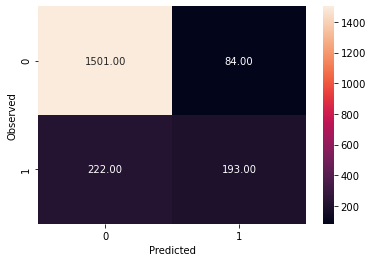

None
Accuracy
0.847

Recall
0.4650602409638554

Precision
0.6967509025270758

F1
0.5578034682080925

Roc Auc
0.7060316977689939



In [210]:
y_predict_chance = model4.predict(X_val2)

threshold = 0.5
y_pred_classes = np.zeros_like(y_predict_chance)
y_pred_classes[y_predict_chance > threshold] = 1

y_test_classes = np.zeros_like(y_val2)
y_test_classes[y_val2 > threshold] = 1

print('Confusion Matrix')
print(draw_cm(y_test_classes, y_pred_classes))

print('Accuracy')
print(str(metrics.accuracy_score(y_test_classes, y_pred_classes)))
print()

print('Recall')
print(str(metrics.recall_score(y_test_classes, y_pred_classes)))
print()

print('Precision')
print(str(metrics.precision_score(y_test_classes, y_pred_classes)))
print()

print('F1')
print(str(metrics.f1_score(y_test_classes, y_pred_classes)))
print()

print('Roc Auc')
print(str(metrics.roc_auc_score(y_test_classes, y_pred_classes)))
print()